In [2]:
! pip install inference

In [3]:
! pip install Roboflow

In [4]:
from inference_sdk import InferenceHTTPClient
from inference import get_model
import supervision as sv
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import textwrap

In [5]:
# initialize the client
CLIENT = InferenceHTTPClient(
    api_url="http://detect.roboflow.com",
    api_key="JVuvSUZ2T8BQEtoGVvtv"
)
# infer on a local image
result = CLIENT.infer("/Users/sarancibia/code/sarabarancibiag/Images-MOJI/images/GinNoChimera/015.jpg", model_id="manga-text-detection/2")

In [19]:
result

{'time': 0.2934137940000028,
 'image': {'width': 1654, 'height': 1169},
 'predictions': [{'x': 688.08984375,
   'y': 198.673828125,
   'width': 135.6796875,
   'height': 213.2109375,
   'confidence': 0.9687103629112244,
   'class': 'text_bubble',
   'class_id': 0,
   'detection_id': '4847ac02-3cef-4882-81b3-08d3dc79c102'},
  {'x': 556.4482421875,
   'y': 442.57421875,
   'width': 179.291015625,
   'height': 197.05859375,
   'confidence': 0.9597862958908081,
   'class': 'text_bubble',
   'class_id': 0,
   'detection_id': '2503e44e-4ea0-4c50-bdac-4b3c45fbec2b'},
  {'x': 530.6044921875,
   'y': 985.29296875,
   'width': 130.833984375,
   'height': 187.3671875,
   'confidence': 0.9538710117340088,
   'class': 'text_bubble',
   'class_id': 0,
   'detection_id': '2806ee07-2193-433c-a9be-ac2f02a23c87'},
  {'x': 1266.34375,
   'y': 910.9921875,
   'width': 100.14453125,
   'height': 155.0625,
   'confidence': 0.9448337554931641,
   'class': 'text_bubble',
   'class_id': 0,
   'detection_id': '

In [7]:
path_img = "/Users/sarancibia/code/sarabarancibiag/Images-MOJI/images/GinNoChimera/015.jpg"
img = cv.imread("/Users/sarancibia/code/sarabarancibiag/Images-MOJI/images/GinNoChimera/015.jpg")
img_trials = img.copy()
img_trials_two = img.copy()
img_trials_three = img.copy()

In [8]:
from xml.etree import ElementTree as ET
import os

PATH = "/Users/sarancibia/Downloads/Manga109s_released_2023_12_07/annotations"

tree = ET.parse(os.path.join(PATH, 'GinNoChimera-es.xml'))
root = tree.getroot()

data = []

for i, pages in enumerate(root[1]):

    page = {}
    page['page'] = i

    bubbles = []

    for elem in pages:

        if elem.tag == 'text':

            info = elem.attrib
            info['text'] = elem.text

            bubbles.append(info)

    page['bubbles'] = bubbles

    data.append(page)

In [9]:
data

[{'page': 0, 'bubbles': []},
 {'page': 1,
  'bubbles': [{'id': '0001b31b',
    'xmin': '622',
    'ymin': '614',
    'xmax': '701',
    'ymax': '703',
    'translated_text': 'Habilidades especiales son cocinar y tareas domésticas en general.',
    'text': '特技は料理および家事全般'},
   {'id': '0001b31c',
    'xmin': '612',
    'ymin': '149',
    'xmax': '670',
    'ymax': '223',
    'translated_text': '1er año clase A Ryusei Tsugi',
    'text': '1年A組\u3000杠\u3000龍星\u3000'},
   {'id': '0001b31d',
    'xmin': '670',
    'ymin': '289',
    'xmax': '727',
    'ymax': '380',
    'translated_text': 'Altura 175 cm Peso 58 kg',
    'text': '身長175cm\u3000体重58kg'},
   {'id': '0001b31f',
    'xmin': '585',
    'ymin': '422',
    'xmax': '661',
    'ymax': '552',
    'translated_text': 'Sus calificaciones son excelentes y es bueno en los deportes.',
    'text': '成績はトップクラスでスポーツ万能'},
   {'id': '0001b320',
    'xmin': '206',
    'ymin': '476',
    'xmax': '283',
    'ymax': '590',
    'translated_text': 'Pero u

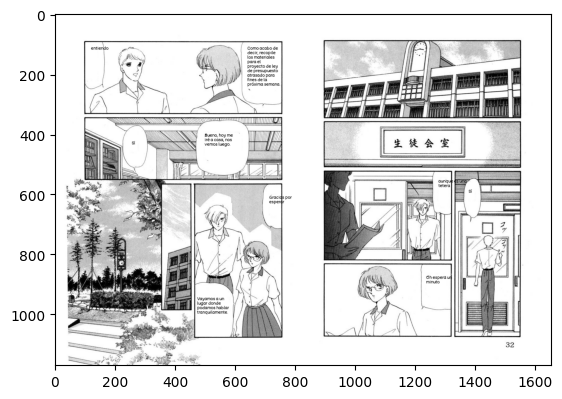

In [36]:
img_pil_two = Image.fromarray(img_trials_two)
draw = ImageDraw.Draw(img_pil_two)

#Se obtiene el numero de página
image_name = os.path.basename(path_img)
page_number = int(image_name.split('.')[0])
page_data = data[page_number]

#Se hace loop sobre ese numero de pagina en data

for bubble in page_data['bubbles']:
    x1 = round(float(bubble['xmin']))
    y1 = round(float(bubble['ymin']))
    x2 = round(float(bubble['xmax']))
    y2 = round(float(bubble['ymax']))

    draw.rounded_rectangle([x1, y1, x2, y2], fill='white', radius=20 )

    #Specs de la fuente
    image_width = img_pil_two.width
    text_size_ratio = 0.009
    font_size = int(image_width * text_size_ratio)
    font_path = "/Users/sarancibia/Library/Fonts/BadComic-Regular.ttf"
    font = ImageFont.truetype(font_path, font_size)
    spacing = 1

    #Inserción de texto
    translated_text = bubble['translated_text']
    wrapped_text = textwrap.fill(translated_text, width=15)
    draw.multiline_text([x1, y1, x2, y2],
                        wrapped_text,
                        fill="black",
                        spacing = spacing,
                        align="left",
                        font_size = font_size,
                        font = font)

plt.imshow(img_pil_two)

img_pil_two.save('imagen_guardada.png')

In [22]:
img_pil_three = Image.fromarray(img_trials_three)
draw = ImageDraw.Draw(img_pil_three)

for bubble in result['predictions']:

        x = round(float(bubble['x']))
        y = round(float(bubble['y']))
        width = round(float(bubble['width']))
        height = round(float(bubble['height']))

        margin = 15

        x1 = round(x - width / 2) + margin
        y1 = round(y - height / 2) + margin
        x2 = round(x + width / 2) - margin
        y2 = round(y + height / 2) - margin

        draw.rounded_rectangle([x1, y1, x2, y2], fill='white', radius=20 )

        font = ImageFont.load_default()
        spacing = 1
        translated_text = bubble['translated_text']

        wrapped_text = textwrap.fill(translated_text, width=15)

        draw.multiline_text([x1, y1, x2, y2],
                            wrapped_text,
                            fill="black",
                            spacing=spacing, align="left",font_size=35)

img_pil_three.save('imagen_guardada.png')

KeyError: 'translated_text'